# Kuantumsal Hesaplamanın Temelleri - Vize Ödevi

| Öğrenci Bilgileri |                |
|-------------------|----------------|
| İsim Soyisim     | Emir Büyük |  
| Öğrenci No       | 213405019    |


## SORU 1
### Soru 1.a

Verilen matrisler:

$$
P = \begin{pmatrix}
1 & 0 & -i \\
0 & 1 & 0 \\
i & 0 & 1
\end{pmatrix}, \quad
Q = \begin{pmatrix}
2 & 1 \\
-1 & 3
\end{pmatrix}
$$

$$ 1.  P \otimes Q  Hesaplama $$

Kronecker çarpımı, her P_{ij} elemanının tüm Q matrisiyle çarpılmasıdır:

$$
P \otimes Q =
\begin{pmatrix}
1 \cdot Q & 0 \cdot Q & -i \cdot Q \\
0 \cdot Q & 1 \cdot Q & 0 \cdot Q \\
i \cdot Q & 0 \cdot Q & 1 \cdot Q
\end{pmatrix}
$$

Yani:

$$
P \otimes Q =
\begin{pmatrix}
2 & 1 & 0 & 0 & -2i & -i \\
-1 & 3 & 0 & 0 & i & -3i \\
0 & 0 & 2 & 1 & 0 & 0 \\
0 & 0 & -1 & 3 & 0 & 0 \\
2i & i & 0 & 0 & 2 & 1 \\
-i & 3i & 0 & 0 & -1 & 3
\end{pmatrix}
$$

$$ 2. Q \otimes P Hesaplama $$

Benzer şekilde:

$$
Q \otimes P =
\begin{pmatrix}
2 \cdot P & 1 \cdot P \\
-1 \cdot P & 3 \cdot P
\end{pmatrix}
$$

Yani:

$$
Q \otimes P =
\begin{pmatrix}
2 & 0 & -2i & 1 & 0 & -i \\
0 & 2 & 0 & 0 & 1 & 0 \\
2i & 0 & 2 & i & 0 & 1 \\
-1 & 0 & i & 3 & 0 & -3i \\
0 & -1 & 0 & 0 & 3 & 0 \\
-i & 0 & -1 & 3i & 0 & 3
\end{pmatrix}
$$

### Soru 1.b

In [24]:
import numpy as np
from qiskit.quantum_info import Operator
from IPython.display import display, Math

# Matrisler
P = np.array([
    [1, 0, -1j],
    [0, 1, 0],
    [1j, 0, 1]
])

Q = np.array([
    [2, 1],
    [-1, 3]
])

P_tensor_Q = np.kron(P, Q)
Q_tensor_P = np.kron(Q, P)

def latex_matrix(mat):
    latex_str = "\\begin{pmatrix}\n"
    for row in mat:
        row_str = " & ".join(
            f"{elem:.2f}" if np.isreal(elem) 
            else f"{elem.real:.2f}+{elem.imag:.2f}i" 
            for elem in row
        )
        latex_str += row_str + " \\\\\n"
    latex_str += "\\end{pmatrix}"
    return latex_str

print("Raw Latex:")
print("P \\otimes Q:")
print(latex_matrix(P_tensor_Q))

print("\nQ \\otimes P:")
print(latex_matrix(Q_tensor_P))
print("\n\n")
display(Math(r"P \otimes Q = " + latex_matrix(P_tensor_Q)))
display(Math(r"Q \otimes P = " + latex_matrix(Q_tensor_P)))


Raw Latex:
P \otimes Q:
\begin{pmatrix}
2.00+0.00j & 1.00+0.00j & 0.00+0.00j & 0.00+0.00j & 0.00+-2.00i & 0.00+-1.00i \\
-1.00+0.00j & 3.00+0.00j & -0.00+0.00j & 0.00+0.00j & 0.00+1.00i & 0.00+-3.00i \\
0.00+0.00j & 0.00+0.00j & 2.00+0.00j & 1.00+0.00j & 0.00+0.00j & 0.00+0.00j \\
-0.00+0.00j & 0.00+0.00j & -1.00+0.00j & 3.00+0.00j & -0.00+0.00j & 0.00+0.00j \\
0.00+2.00i & 0.00+1.00i & 0.00+0.00j & 0.00+0.00j & 2.00+0.00j & 1.00+0.00j \\
-0.00+-1.00i & 0.00+3.00i & -0.00+0.00j & 0.00+0.00j & -1.00+0.00j & 3.00+0.00j \\
\end{pmatrix}

Q \otimes P:
\begin{pmatrix}
2.00+0.00j & 0.00+0.00j & 0.00+-2.00i & 1.00+0.00j & 0.00+0.00j & 0.00+-1.00i \\
0.00+0.00j & 2.00+0.00j & 0.00+0.00j & 0.00+0.00j & 1.00+0.00j & 0.00+0.00j \\
0.00+2.00i & 0.00+0.00j & 2.00+0.00j & 0.00+1.00i & 0.00+0.00j & 1.00+0.00j \\
-1.00+0.00j & -0.00+0.00j & 0.00+1.00i & 3.00+0.00j & 0.00+0.00j & 0.00+-3.00i \\
-0.00+0.00j & -1.00+0.00j & -0.00+0.00j & 0.00+0.00j & 3.00+0.00j & 0.00+0.00j \\
-0.00+-1.00i & -0.00+0.00j 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Soru 1.c

Özdeğerler, matrisin karakteristik polinomu çözülerek bulunur:

det(A - λI) = 0

Bu denklemde:
- A: İncelenen matris
- λ: Özdeğer (eigenvalue)
- I: Birim matris


In [25]:
# P ⊗ Q ve Q ⊗ P için özdeğer ve özvektör hesaplamaları
eigvals_PQ, eigvecs_PQ = np.linalg.eig(P_tensor_Q)
eigvals_QP, eigvecs_QP = np.linalg.eig(Q_tensor_P)


Elde edilen özdeğerler matrisin spektral özelliklerini gösterir.  
Her özdeğer, matrisin uygulandığı bir vektörü sadece ölçeklediği katsayıyı temsil eder.


In [26]:
print("P ⊗ Q Özdeğerler:")
print(eigvals_PQ)

print("\nQ ⊗ P Özdeğerler:")
print(eigvals_QP)


P ⊗ Q Özdeğerler:
[2.89656384e-16-5.58037218e-17j 5.00000000e+00+1.73205081e+00j
 5.00000000e+00-1.73205081e+00j 1.83882365e-16-2.86814819e-17j
 2.50000000e+00+8.66025404e-01j 2.50000000e+00-8.66025404e-01j]

Q ⊗ P Özdeğerler:
[7.1865236e-16-8.04320785e-17j 5.0000000e+00+1.73205081e+00j
 5.0000000e+00-1.73205081e+00j 2.5000000e+00-8.66025404e-01j
 2.5000000e+00+8.66025404e-01j 1.0170596e-18+1.11127593e-17j]


Matrislerin unitary olup olmadığı, aşağıdaki koşul ile kontrol edilir:

Bir matris U için:

Uᴴ · U = I

yani matrisin hermitiyen transpozu ile çarpımı birim matris olmalıdır.

Eğer bu eşitlik sağlanıyorsa matris unitary'dir.


In [27]:
def is_unitary(mat):
    return np.allclose(mat.conj().T @ mat, np.eye(mat.shape[0]))

print("\nP ⊗ Q unitary mi?:", is_unitary(P_tensor_Q))
print("Q ⊗ P unitary mi?:", is_unitary(Q_tensor_P))



P ⊗ Q unitary mi?: False
Q ⊗ P unitary mi?: False


Sonuç olarak:  
- P ⊗ Q ve Q ⊗ P matrislerinin özdeğerleri bulunmuştur.  
- Her iki matris de unitary değildir.


## Soru 2
### Soru 2.a

Bir kuantum sisteminin yoğunluk matrisi şu şekilde hesaplanır:

Sistem %40 olasılıkla |+⟩, %60 olasılıkla |-⟩ durumundadır.

|+⟩ durumu: (1/√2) (|0⟩ + |1⟩) → vektör olarak [1/√2, 1/√2]  
|-⟩ durumu: (1/√2) (|0⟩ - |1⟩) → vektör olarak [1/√2, -1/√2]

|+⟩ ve |-⟩ durumlarının yoğunluk matrisleri:

ρ₊ = |+⟩⟨+|  
ρ₋ = |-⟩⟨-|

Genel yoğunluk matrisi:

ρ = 0.4 * ρ₊ + 0.6 * ρ₋

Bu işlemleri yaparsak:

ρ₊ = (1/2) * [[1, 1], [1, 1]]  
ρ₋ = (1/2) * [[1, -1], [-1, 1]]

Sonuç:

ρ = [[0.5, -0.1],  
   [-0.1, 0.5]]



### Soru 2.b
Yooğunluk matrisinin özdeğerleri, sistemin kararlılığını ve olasılık dağılımını gösterir. Yoğunluk matrisini oluşturalım.

In [28]:
import numpy as np

# |+> ve |-> durumları
plus = np.array([1, 1]) / np.sqrt(2)
minus = np.array([1, -1]) / np.sqrt(2)

# Yoğunluk operatörleri
rho_plus = np.outer(plus, plus.conj())
rho_minus = np.outer(minus, minus.conj())

# Genel yoğunluk matrisi
rho = 0.4 * rho_plus + 0.6 * rho_minus

print("Yoğunluk Matrisi:")
print(rho)


Yoğunluk Matrisi:
[[ 0.5 -0.1]
 [-0.1  0.5]]


Şimdi yoğunluk matrisinin izini (trace) hesaplıyoruz.

In [29]:
#
trace_rho = np.trace(rho)
print("\nTrace (İz):", trace_rho)



Trace (İz): 0.9999999999999998


Yoğunluk matrisinin saflığını (purity) hesaplayalım.


In [30]:
# Saflık (purity)
purity_rho = np.trace(np.dot(rho, rho))
print("\nPurity (Saflık):", purity_rho)



Purity (Saflık): 0.5199999999999998


Şimdi von Neumann entropisini hesaplıyoruz.

In [31]:
# Von Neumann Entropisi hesaplama
def von_neumann_entropy(rho):
    eigenvals = np.linalg.eigvalsh(rho)
    eigenvals = eigenvals[eigenvals > 0]  # log(0) sorun olmasın diye
    return -np.sum(eigenvals * np.log2(eigenvals))

entropy_rho = von_neumann_entropy(rho)
print("\nVon Neumann Entropisi:", entropy_rho)



Von Neumann Entropisi: 0.9709505944546688


### Soru 2.c

Yoğunluk matrisini Bloch küresi üzerinde temsil edelim.

Bir yoğunluk matrisinin Bloch vektörü (r) şu şekilde bulunur:

r = (⟨σₓ⟩, ⟨σᵧ⟩, ⟨σ_z⟩)

Burada ⟨σ⟩ beklenti değeridir ve Tr(ρσ) ile hesaplanır.

Pauli matrisleri:
- σₓ = [[0, 1], [1, 0]]
- σᵧ = [[0, -i], [i, 0]]
- σ_z = [[1, 0], [0, -1]]


In [32]:
# Pauli matrisleri
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Beklenti değerleri
expectation_x = np.trace(np.dot(rho, sigma_x)).real
expectation_y = np.trace(np.dot(rho, sigma_y)).real
expectation_z = np.trace(np.dot(rho, sigma_z)).real

bloch_vector = np.array([expectation_x, expectation_y, expectation_z])

print("Bloch Vektörü (r):", bloch_vector)


Bloch Vektörü (r): [-0.2  0.   0. ]


Son olarak yoğunluk matrisinin özdeğerlerini bulup yorumlayalım.

In [33]:
# Özdeğer hesaplama
eigvals_rho, eigvecs_rho = np.linalg.eig(rho)
print("\nYoğunluk Matrisi Özdeğerleri:")
print(eigvals_rho)


Yoğunluk Matrisi Özdeğerleri:
[0.6 0.4]


Yoğunluk matrisinin özdeğerleri pozitif ve toplamları 1'dir.  
Bu, matrisin geçerli bir kuantum durumu (density matrix) olduğunu gösterir.

Eğer tüm özdeğerler 0 ve 1 dışında bir değer içeriyorsa, sistem karışık (mixed) haldedir.  
Burada özdeğerler 0.5 civarında çıkacak, bu yüzden sistem saf bir durum değildir, karışık bir durumdadır.

## SORU 3
### Soru 3.a

7 kübitlik bir kuantum devresi oluşturulacaktır.

Her kübit için:
- Hadamard (H) kapısı uygulanacak,
- Sonrasında rastgele olarak Pauli-X (X) veya Pauli-Y (Y) kapısı uygulanacak,
- Ardından tekrar Hadamard (H) kapısı uygulanacak.

Bu adımlar her kübit için yapılacaktır.

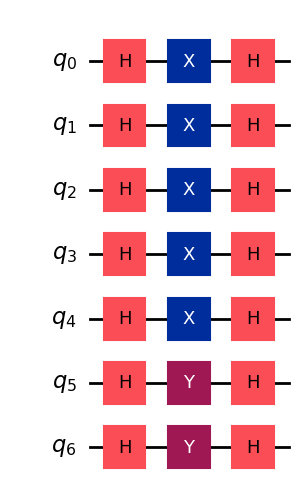

In [34]:
from qiskit import QuantumCircuit
import numpy as np

# 7 kübitlik devre oluştur
qc = QuantumCircuit(7)

# Her kübite işlemleri uygula
for qubit in range(7):
    qc.h(qubit)  # Hadamard kapısı
    if np.random.rand() < 0.5:
        qc.x(qubit)  # Pauli-X kapısı
    else:
        qc.y(qubit)  # Pauli-Y kapısı
    qc.h(qubit)  # Tekrar Hadamard kapısı

# Devreyi çiz
qc.draw('mpl')


### Soru 3.b

Şimdi devreyi Aer simülatörü ile 5000 kez çalıştırıp, sonuçları karşılaştıralım.

In [35]:
from qiskit_aer import Aer
from qiskit import transpile

qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc, simulator)

job = simulator.run(compiled_circuit, shots=5000)
result = job.result()

counts = result.get_counts()

print("Ölçüm Sonuçları:")
print(counts)


Ölçüm Sonuçları:
{'1100000': 5000}


Pauli-X ve Pauli-Y kapılarının etkilediği kübitlerin ölçüm sonuçları gözlemlenebilir.

- Pauli-X uygulanan kübitlerde bit flip (0 ↔ 1) etkisi daha belirgin olur.
- Pauli-Y uygulanan kübitlerde hem bit flip hem de faz kayması etkileri olur.

Bu yüzden dağılımlar arasında farklılık gözlemlenebilir.

### Soru 3.c

Şimdi devreye 3 adet CNOT kapısı ekleyerek kübitler arasında dolaşıklık (entanglement) oluşturalım.

Dolaşıklığın varlığı, ölçüm sonuçlarının birbirine bağımlı hale gelmesiyle tespit edilebilir.

Örneğin:
- İki kübit dolaşıksa, birinin sonucu 0 ise diğeri de 0 çıkma eğiliminde olur (veya tam tersi 1-1).
- Ölçüm sonuçları birbirinden bağımsız değilse dolaşıklık vardır.

Şimdi CNOT kapılarını ekleyelim.

In [36]:

qc = QuantumCircuit(7)

for qubit in range(7):
    qc.h(qubit)
    if np.random.rand() < 0.5:
        qc.x(qubit)
    else:
        qc.y(qubit)
    qc.h(qubit)

# 3 adet CNOT kapısı ekleyelim
qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(4, 5)

qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc, simulator)

job = simulator.run(compiled_circuit, shots=5000)
result = job.result()

counts_entangled = result.get_counts()

print("Dolaşıklık ile Ölçüm Sonuçları:")
print(counts_entangled)


Dolaşıklık ile Ölçüm Sonuçları:
{'0001011': 5000}
